In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras

In [2]:
# Check if on GPU

assert len(tf.config.list_physical_devices('GPU')) > 0

In [3]:
# Load MNIST dataset

mnist = tf.keras.datasets.mnist
(images, labels), (test_images, test_labels) = mnist.load_data()

VAL_SPLIT = 10000

train_images, val_images = images[:50000], images[50000:]
train_labels, val_labels = labels[:50000], labels[50000:]

print(f"Train set shape: {train_images.shape}")
print(f"Val set shape: {val_images.shape}")
print(f"Test set shape: {test_images.shape}")

Train set shape: (50000, 28, 28)
Val set shape: (10000, 28, 28)
Test set shape: (10000, 28, 28)


In [4]:
# Normalize the data in range [0, 1] 
# Add a new dimension representing single channel
# Cast to relevant type

train_images = (np.expand_dims(train_images, axis=-1)/255.).astype(np.float32)
train_labels = train_labels.astype(np.int64)

val_images = (np.expand_dims(val_images, axis=-1)/255.).astype(np.float32)
val_labels = val_labels.astype(np.int64)

test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
test_labels = test_labels.astype(np.int64)

print(f"Train set shape: {train_images.shape}")
print(f"Val set shape: {val_images.shape}")
print(f"Test set shape: {test_images.shape}")

Train set shape: (50000, 28, 28, 1)
Val set shape: (10000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


In [112]:
# Plot some sample images from train set

def plot_images_with_labels(data_length, images, labels, num=20, preds=None):    
    plt.figure(figsize=(10,10), dpi=120)
    random_ints = np.random.choice(data_length, size=num)
    for i in range(num):
        plt.subplot(5, 5, i + 1)
        plt.imshow(np.squeeze(images[random_ints[i]]), cmap=plt.cm.binary)
        if preds is not None:
            plt.xlabel(f"P: {np.array([np.argmax(pred) for pred in preds])[random_ints[i]]} | A: {np.squeeze(labels[random_ints[i]])}")
        else:
            plt.xlabel(labels[random_ints[i]])
        plt.xticks([])
        plt.yticks([])

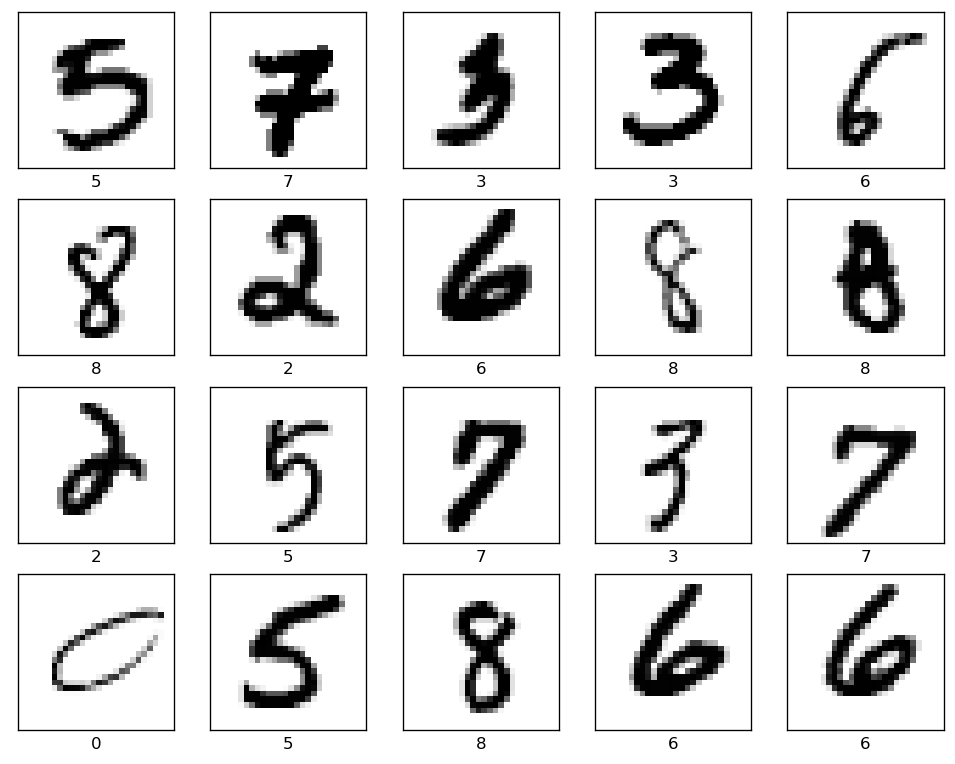

In [110]:
plot_images_with_labels(train_images.shape[0], train_images, train_labels)

In [7]:
# Define ANN architecture
#   Flatten -> 28*28 = 784
#   Dense Layer -> 128 neurons; activation = relu
#   Dense Layer -> 10 neurons (representing probabilities of 0-9 digits) ; activation = softmax (probablity is needed)

def build_ann_model():
    ann_model = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return ann_model

In [35]:
# Build and compile the model with parameters
#  Optimizer -> SGD | Adam ; learning_rate of choice
#  Loss -> sparse categorical crossentropy
#  metrics -> accuracy

model = build_ann_model()

LR = 1e-1

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=LR),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
# Train the model using batch training

EPOCHS = 15
BATCH_SIZE = 56

model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/15
893/893 [==============================] - 2s 2ms/step - loss: 0.3871 - accuracy: 0.8917
Epoch 2/15
893/893 [==============================] - 2s 2ms/step - loss: 0.2049 - accuracy: 0.9419
Epoch 3/15
893/893 [==============================] - 2s 2ms/step - loss: 0.1548 - accuracy: 0.9558
Epoch 4/15
893/893 [==============================] - 2s 2ms/step - loss: 0.1252 - accuracy: 0.9644
Epoch 5/15
893/893 [==============================] - 2s 2ms/step - loss: 0.1056 - accuracy: 0.9702
Epoch 6/15
893/893 [==============================] - 2s 2ms/step - loss: 0.0908 - accuracy: 0.9748
Epoch 7/15
893/893 [==============================] - 2s 2ms/step - loss: 0.0803 - accuracy: 0.9776
Epoch 8/15
893/893 [==============================] - 2s 2ms/step - loss: 0.0710 - accuracy: 0.9799
Epoch 9/15
893/893 [==============================] - 2s 2ms/step - loss: 0.0635 - accuracy: 0.9820
Epoch 10/15
893/893 [==============================] - 2s 2ms/step - loss: 0.0567 - accuracy: 0.9848

In [37]:
# Evaluate accuracy and loss on validation set
# Tune the model to achieve better results based on validation loss and accuracy

val_loss, val_accuracy = model.evaluate(val_images, val_labels)

print(f"Loss on val set: {val_loss}")
print(f"Accuracy on val set: {val_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0815 - accuracy: 0.9762
Loss on val set: 0.08149026334285736
Accuracy on val set: 0.9761999845504761


In [38]:
# Finally Evaluate accuracy and loss on test set
# Donot tune the model further for preventing data leakage from test set to training

test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Loss on test set: {test_loss}")
print(f"Accuracy on test set: {test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0770 - accuracy: 0.9761
Loss on test set: 0.07700953632593155
Accuracy on test set: 0.9761000275611877


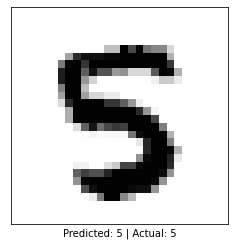

In [59]:
# Check prediction on a test image

SAMPLE_IDX = 120

sample = test_images[SAMPLE_IDX:SAMPLE_IDX+1]
sample_label = test_labels[SAMPLE_IDX:SAMPLE_IDX+1]
preds = model.predict(sample)
plt.imshow(np.squeeze(sample), cmap=plt.cm.binary)
plt.xlabel(f"Predicted: {np.argmax(preds)} | Actual: {np.squeeze(sample_label)}")
plt.xticks([])
plt.yticks([]);

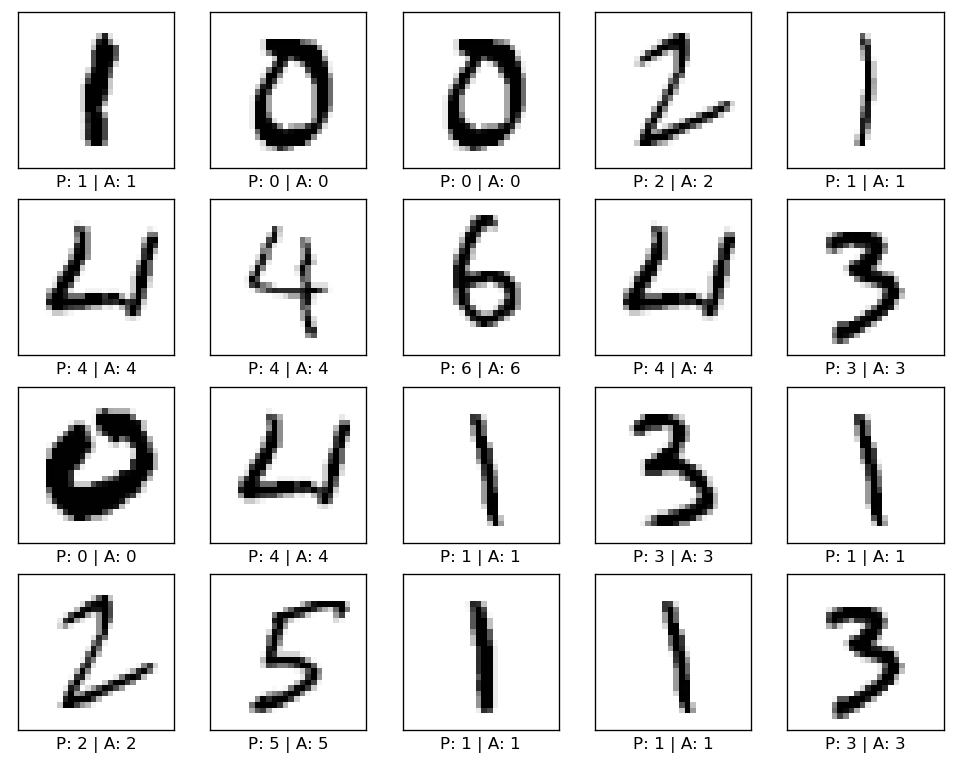

In [114]:
sample_images = test_images[21:42]
sample_labels = test_labels[21:42]

preds = model.predict(sample_images)

plot_images_with_labels(20, sample_images, sample_labels, num=20, preds=preds)